In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# For plotting the regression tree
from IPython.display import Image
import pydotplus


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
df.shape

(15730, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [ ]:
df.nunique()

id            15730
title          4782
Rating           34
maincateg         2
platform          2
price1         1478
actprice1       885
Offer %        2530
norating1      2770
noreviews1     1122
star_5f        2196
star_4f        1448
star_3f        1107
star_2f         759
star_1f        1001
fulfilled1        2
dtype: int64

In [ ]:
df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [ ]:
df.maincateg.value_counts()

Women    8781
Men      6423
Name: maincateg, dtype: int64

In [ ]:

df['star_5f'] = df['star_5f'].fillna(df['star_5f'].mean())
df['star_4f'] = df['star_4f'].fillna(df['star_4f'].mean())
df['star_3f'] = df['star_3f'].fillna(df['star_3f'].mean())
df['noreviews1'] = df['noreviews1'].fillna(df['noreviews1'].mean())
df.loc[df['title'].str.contains("Men"), "maincateg"] = "Men"
df.loc[df['title'].str.contains("Women"), "maincateg"] = "Women"

In [ ]:
df['maincateg'] = df['maincateg'].fillna('Women')

In [ ]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1      0
star_5f         0
star_4f         0
star_3f         0
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [ ]:
df['norating1'] = df['norating1'].fillna(df['star_5f']+df['star_4f']+df['star_3f']+df['star_2f']+df['star_1f'])

In [ ]:
df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

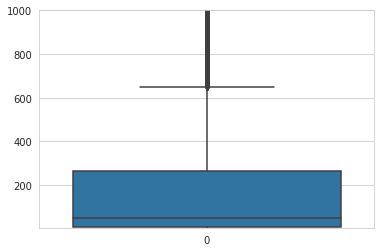

In [ ]:
sns.set_style("whitegrid")

ax = sns.boxplot( data= df['noreviews1'])
plt.ylim(5, 1000)
plt.show()

In [ ]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
df = df.drop(['title','id'], axis = 1)
df.head()

,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
y = df['price1']


In [ ]:
df = pd.get_dummies(df, columns= ['maincateg','platform'])
df.head()

,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,0,1,0,1
1,3.8,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,1,0,0,1
2,4.4,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,0,1,0,1
3,4.2,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,1,0,0,1
4,3.9,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,1,0,0,1


In [ ]:
df = df.drop(['price1'], axis = 1)

In [ ]:
X = df[:]
X.head()

,Rating,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,0,1,0,1
1,3.8,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,1,0,0,1
2,4.4,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,0,1,0,1
3,4.2,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,1,0,0,1
4,3.9,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,1,0,0,1


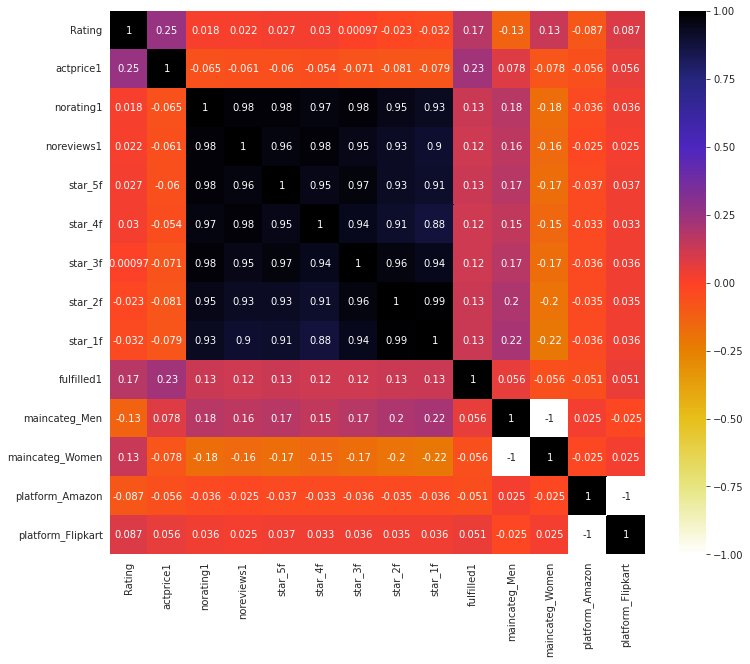

In [ ]:
plt.figure(figsize = (12,10))
cor = X.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)

In [ ]:
 X= X.drop(['Offer %','star_4f','star_1f','star_2f','star_5f','star_3f'], axis = 1)
X.head()

,Rating,actprice1,norating1,noreviews1,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,999,38.0,7.0,0,0,1,0,1
1,3.8,1999,531.0,69.0,1,1,0,0,1
2,4.4,4999,17.0,4.0,1,0,1,0,1
3,4.2,724,46413.0,6229.0,1,1,0,0,1
4,3.9,2299,77.0,3.0,1,1,0,0,1


In [ ]:
quantile1, quantile3= np.percentile(X['norating1'],[25,75])
iqr =quantile3-quantile1
lower_bound_val_rating = quantile1 -(1.5 * iqr)
upper_bound_val_rating = quantile3 +(1.5 * iqr)


In [ ]:
print(lower_bound_val_rating,upper_bound_val_rating)

-2501.5 4350.5


In [ ]:
quantile11, quantile31= np.percentile(X['noreviews1'],[25,75])
iqr1 =quantile31-quantile11
lower_bound_val_review = quantile11 -(1.5 * iqr1)
upper_bound_val_review = quantile31 +(1.5 * iqr1)

In [ ]:
print(lower_bound_val_review,upper_bound_val_review)

-376.125 650.875


In [ ]:
X['norating1'][X['norating1']>4350.5] = 4350.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X['noreviews1'][X['noreviews1']>650.875] = 650.875

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


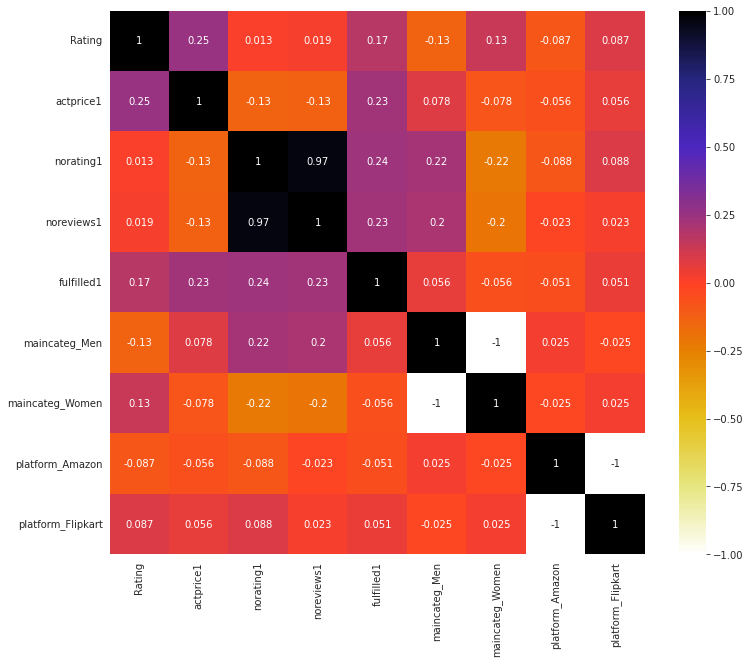

In [ ]:
plt.figure(figsize = (12,10))
cor = X.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)

In [ ]:
X.head()

,Rating,actprice1,norating1,noreviews1,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,999,38.0,7.000,0,0,1,0,1
1,3.8,1999,531.0,69.000,1,1,0,0,1
2,4.4,4999,17.0,4.000,1,0,1,0,1
3,4.2,724,4350.5,650.875,1,1,0,0,1
4,3.9,2299,77.0,3.000,1,1,0,0,1


In [ ]:
model = RandomForestRegressor(random_state = 2021,max_features = 'sqrt',n_estimators=100,n_jobs =1,oob_score = True)

In [ ]:
model.fit(X,y)

RandomForestRegressor(max_features='sqrt', n_jobs=1, oob_score=True,
                      random_state=2021)

In [ ]:


y_train_pred = model.predict(X)
print("RMSE score for Training data: ", np.sqrt(mean_squared_error(y, y_train_pred)))

RMSE score for Training data:  83.12374382167134


In [ ]:
df_test =  pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test.head()


,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [ ]:
df_test.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [ ]:
df_test.maincateg.value_counts()

Women    3032
Men      2145
Name: maincateg, dtype: int64

In [ ]:
df_test.loc[df_test['title'].str.contains("Men"), "maincateg"] = "Men"
df_test.loc[df_test['title'].str.contains("Women"), "maincateg"] = "Women"
df_test['Rating'] = df_test['Rating'].fillna(df_test['Rating'].mean())


In [ ]:
df_test['maincateg'] = df_test['maincateg'].fillna('Women')

In [ ]:
df_test.isnull().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [ ]:
 df_test= df_test.drop(['id','title'], axis = 1)
 df_test.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [ ]:
df_test = pd.get_dummies(df_test, columns= ['maincateg','platform'])
df_test.head()

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.8,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,1,0,0,1
1,3.9,499,3015,404,1458.0,657,397,182,321.0,1,0,1,0,1
2,3.9,999,449,52,229.0,70,71,33,46.0,1,0,1,0,1
3,3.9,2999,290,40,141.0,51,49,17,32.0,1,1,0,0,1
4,3.9,999,2423,326,1265.0,414,293,143,308.0,0,1,0,0,1


In [ ]:
df_test = df_test.drop(['star_3f','star_4f','star_1f','star_2f','star_5f'],axis = 1)
df_test.head()

,Rating,actprice1,norating1,noreviews1,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.8,999,27928,3543,1,1,0,0,1
1,3.9,499,3015,404,1,0,1,0,1
2,3.9,999,449,52,1,0,1,0,1
3,3.9,2999,290,40,1,1,0,0,1
4,3.9,999,2423,326,0,1,0,0,1


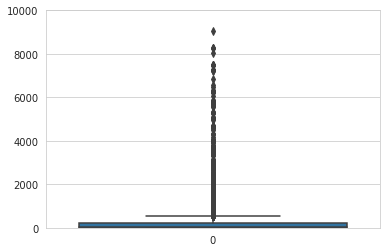

In [ ]:
sns.set_style("whitegrid")

ax = sns.boxplot( data= df_test['noreviews1'])
plt.ylim(0,10000)
plt.show()

In [ ]:
quantile1, quantile3= np.percentile(df_test['norating1'],[25,75])
iqr =quantile3-quantile1
lower_bound_val_rating = quantile1 -(1.5 * iqr)
upper_bound_val_rating = quantile3 +(1.5 * iqr)

In [ ]:
print(lower_bound_val_rating,upper_bound_val_rating)

-1977.0 3471.0


In [ ]:
quantile11, quantile31= np.percentile(X['noreviews1'],[25,75])
iqr1 =quantile31-quantile11
lower_bound_val_review = quantile11 -(1.5 * iqr1)
upper_bound_val_review = quantile31 +(1.5 * iqr1)

In [ ]:
print(lower_bound_val_review,upper_bound_val_review)

-376.125 650.875


In [ ]:
df_test['norating1'][df_test['norating1']>3471.0] = 3471.0
df_test['noreviews1'][df_test['noreviews1']>650.875] = 650.875

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
y_pred = model.predict(df_test)

In [ ]:
df_new = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
pred = pd.DataFrame(y_pred,columns=['price1'])
sub = pd.concat([df_new['id'],pred],axis=1)
sub

,id,price1
0,2242,449.995086
1,20532,286.060000
2,10648,483.845000
3,20677,1141.130000
4,12593,399.891937
...,...,...
5239,14033,309.514000
5240,297,517.938011
5241,18733,390.147370
5242,6162,330.760000


In [ ]:
sub.to_csv(f"Last_Ones.csv",index = False)
files.download('Last_Ones.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>